[[ 0 10 20]
 [30 40 50]
 [60 70 80]]
0
10
20
30
40
50
60
70
80


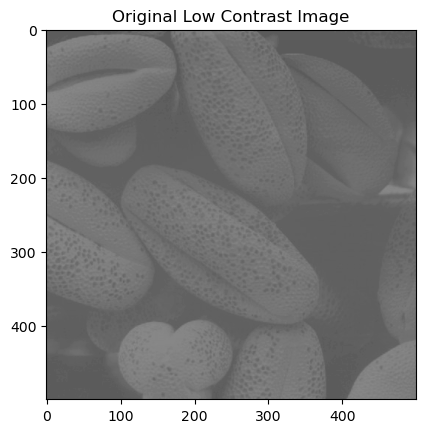

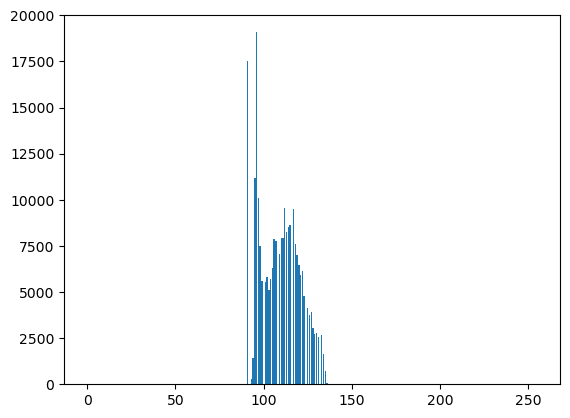

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

testArr = np.arange(9).reshape(3,3) *10
print(testArr)


for x in np.nditer(testArr):
    print(x)

def imghistogram(arr, numLevels = 256):
    histogram = np.zeros(numLevels)
    for pixel in np.nditer(arr):
        histogram[pixel] += 1
    return histogram

exampleImg = Image.open("Images/LowContrast.tif")
exampleArr = asarray(exampleImg, dtype=int)

plt.imshow(exampleArr, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original Low Contrast Image")
plt.show()

histogram = imghistogram(exampleArr)

plt.bar(np.arange(256), histogram)
plt.show()



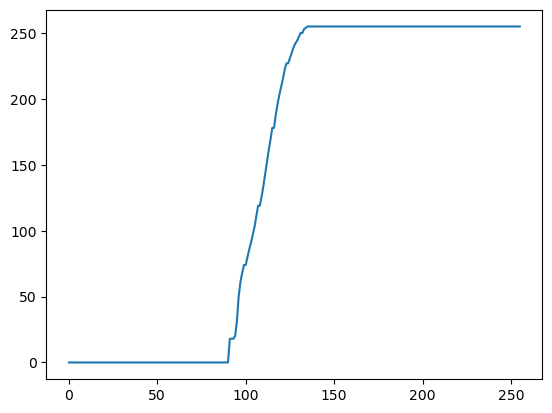

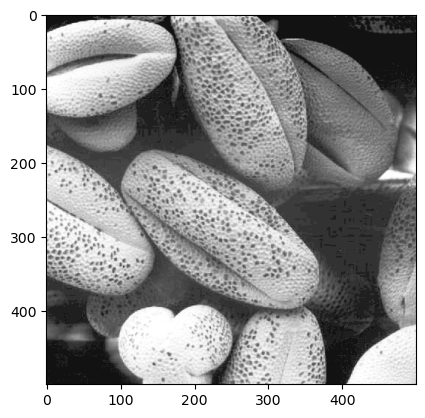

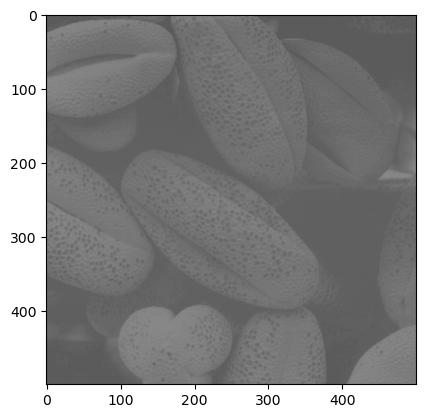

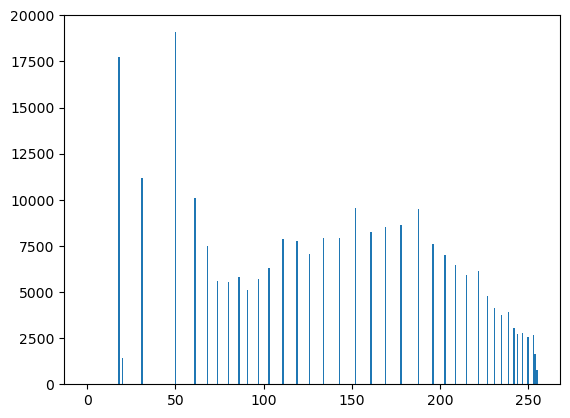

255


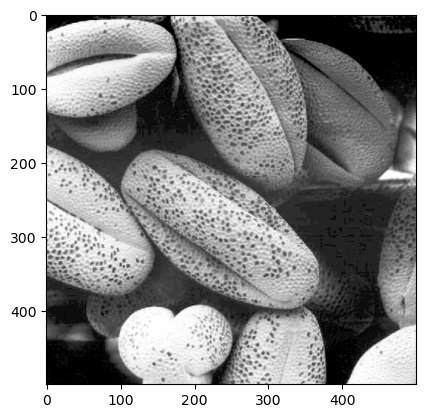

In [79]:
exampleImg = Image.open("Images/LowContrast.tif")
exampleArr = asarray(exampleImg, dtype=int)
import math

def histogram_eq(imgArr):
    histogram = imghistogram(imgArr)
    transArr = np.zeros(256)
    # Get transformation function
    for i in range(256):
        sum = 0
        for j in range(i+1):
            pixelProb = histogram[j]
            sum += pixelProb
        
        transArr[i] = round((255*sum)/(imgArr.shape[0]*imgArr.shape[1]))
    
    
    plt.plot(transArr)
    plt.show()
    
    # Apply transformation function
    outputArr = np.zeros(imgArr.shape, dtype=int)
    for (ind, val) in np.ndenumerate(imgArr):
        outputArr[ind] = transArr[val]
        
    return outputArr, transArr

exampleHistEqArr, transArr = histogram_eq(exampleArr)

plt.imshow(exampleHistEqArr,cmap="gray",vmin=0,vmax=255)
plt.show()

plt.imshow(exampleArr,cmap="gray", vmin=0, vmax=255)
plt.show()

newHistogram = imghistogram(exampleHistEqArr)

plt.bar(np.arange(256), newHistogram)
plt.show()

def normalize(imgArr, a=0, b=255):
    minVal = imgArr.min()
    maxVal = imgArr.max()
    for i in range(imgArr.shape[0]):
        for j in range(imgArr.shape[1]):
          imgArr[i,j] = a + ((imgArr[i,j]-minVal)/(maxVal-minVal)) * (b-a)
          imgArr[i,j] = round(imgArr[i,j])
    return imgArr

normalizedHistImg = normalize(exampleHistEqArr)
print(np.amax(normalizedHistImg))

plt.imshow(normalizedHistImg,cmap="gray", vmin=0, vmax=255)
plt.show()

def compare_arrays(arr1, arr2):
    for ind in np.ndindex(arr1.shape):
        if arr1[ind] - 1 < arr2[ind] or arr1[ind] + 1 > arr2[ind]:
            return False
    return True

normHistogram = imghistogram(normalizedHistImg)






In [40]:
def fooint(num):
    num = 100
    return num

def fooarr(arr):
    arr[0] = 100
    return arr

testNum = 0
testArr = np.arange(4)

print(f"The original value of testNum is: {testNum}")
print(f"The original value of testArr is: {testArr}")

newNum = fooint(testNum)
newArr = fooarr(testArr)

print(f"The value of testNum after being passed to the function is: {testNum}")
print(f"The value of testArr after being passed to the function is: {testArr}")



The original value of testNum is: 0
The original value of testArr is: [0 1 2 3]
The value of testNum after being passed to the function is: 0
The value of testArr after being passed to the function is: [100   1   2   3]


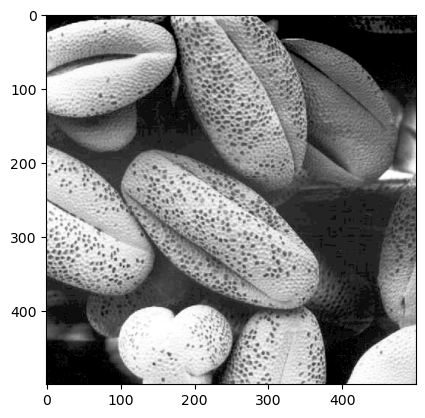

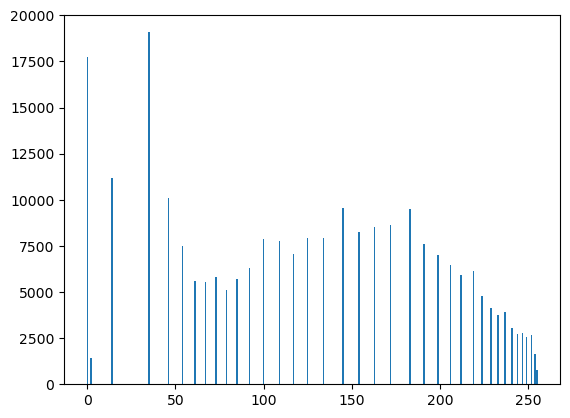

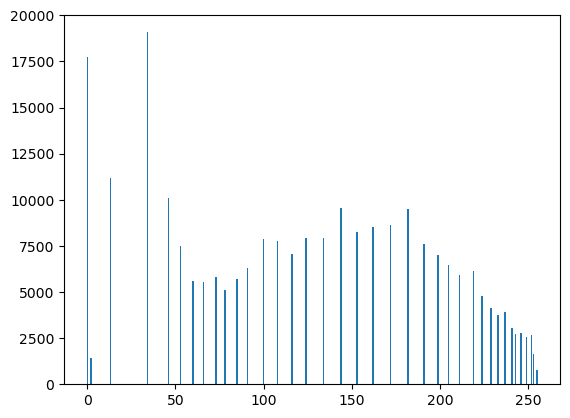

0
-1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
import cv2 as cv

img = cv.imread("Images/LowContrast.tif", cv.IMREAD_GRAYSCALE)



imgHist = cv.equalizeHist(img)



plt.imshow(imgHist, cmap="gray", vmin=0, vmax=255)
plt.show()

histogram = imghistogram(imgHist)
plt.bar(np.arange(256), histogram)
plt.show()

plt.bar(np.arange(256), normHistogram)
plt.show()

subtractionArr = normalizedHistImg-imgHist
print(np.amax(subtractionArr))
print(np.amin(subtractionArr))

